# Demo - 18 - Insurance Bill

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

import plotly.express as px
import plotly.io as pio
pio.renderers.default='notebook'
from plotly.offline import init_notebook_mode

from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# import warnings
# warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('insurance.csv')
data.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
data.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [4]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

## Label Encoding

In [6]:
#sex
le = LabelEncoder()
le.fit(data.sex.drop_duplicates()) 
data.sex = le.transform(data.sex)
# smoker or not
le.fit(data.smoker.drop_duplicates()) 
data.smoker = le.transform(data.smoker)
#region
le.fit(data.region.drop_duplicates()) 
data.region = le.transform(data.region)

In [7]:
data.corrwith(data['charges']).sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
dtype: float64

In [8]:
# Alternatively
data.corr()['charges'].sort_values(ascending=False)

charges     1.000000
smoker      0.787251
age         0.299008
bmi         0.198341
children    0.067998
sex         0.057292
region     -0.006208
Name: charges, dtype: float64

## Heatmap

<Axes: >

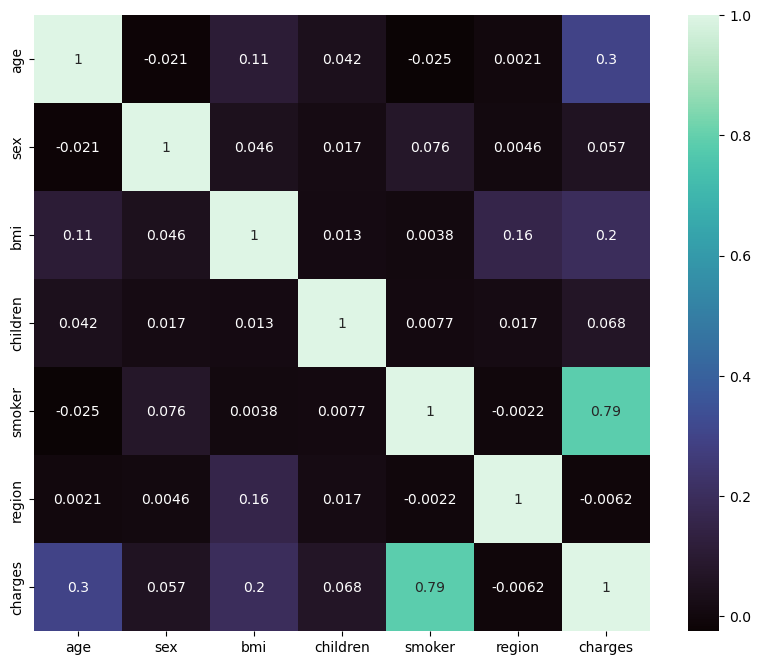

In [9]:
f, ax = pl.subplots(figsize=(10, 8))
corr = data.corr()
sns.heatmap(corr, square=True, ax=ax, annot=True, cmap='mako')

## Distribution of charges

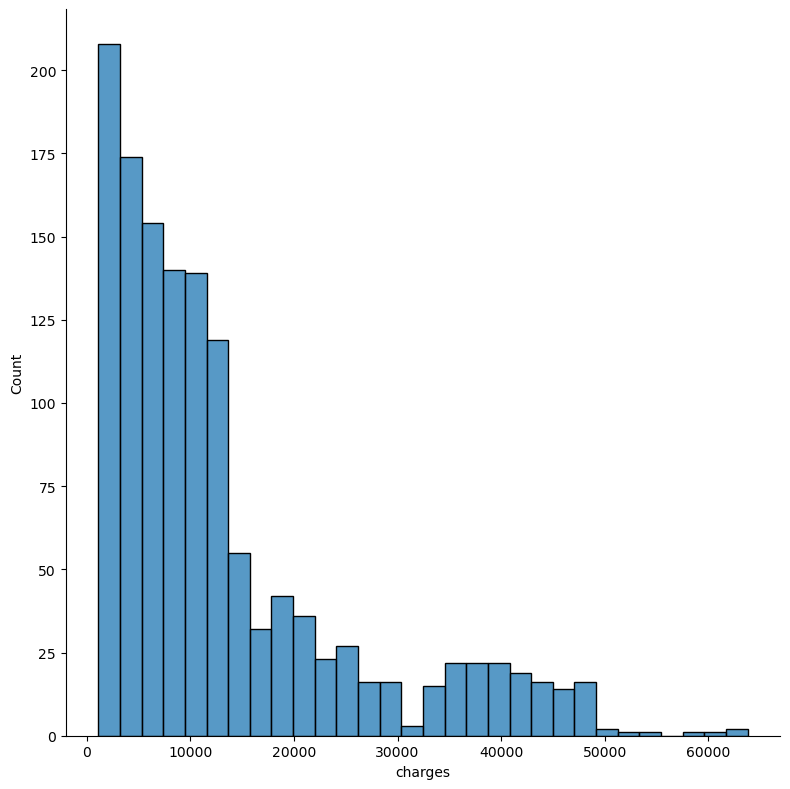

In [10]:
sns.displot(data, x="charges", height=8)

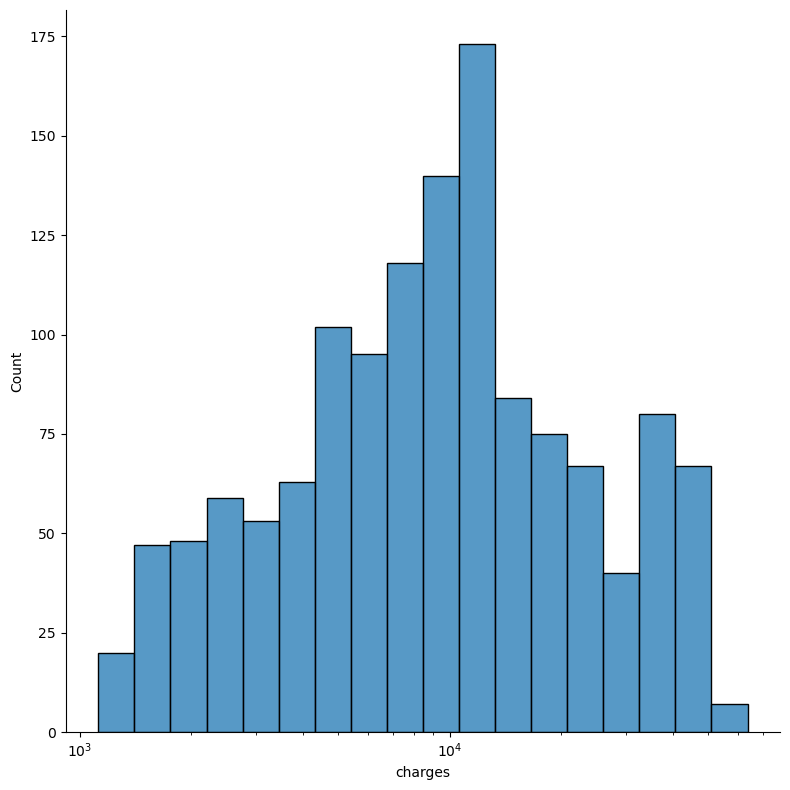

In [11]:
sns.displot(data, x="charges", height=8, log_scale=True)

## Charge on smoker and non-smoker 

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

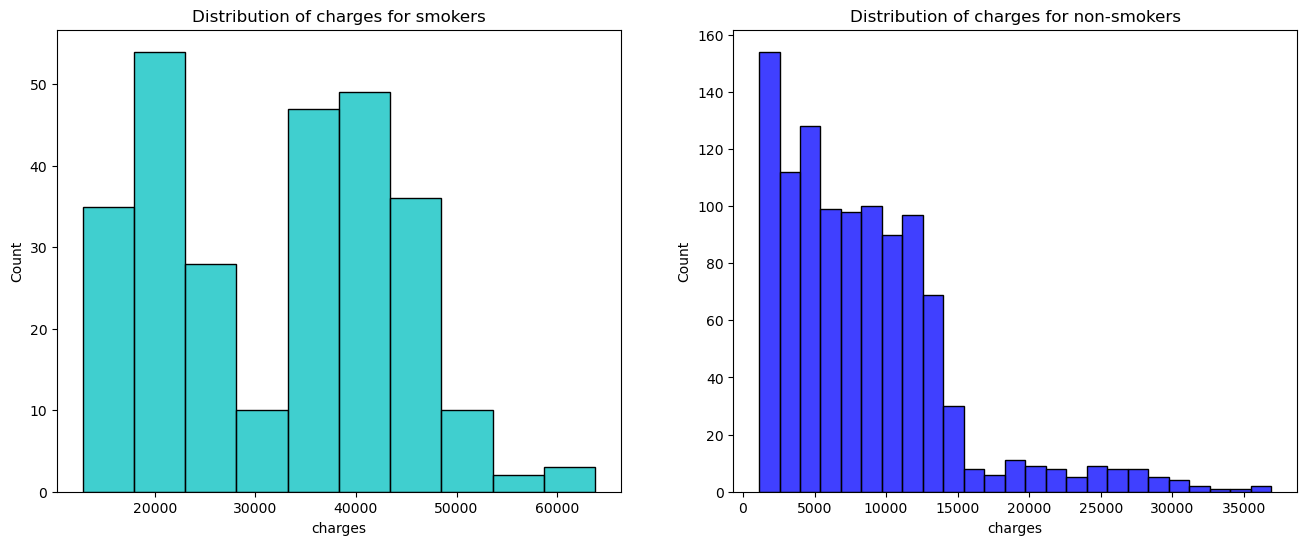

In [12]:
f= pl.figure(figsize=(16,6))

ax=f.add_subplot(121)
sns.histplot(data[(data.smoker == 1)]["charges"],color='c',ax=ax)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(data[(data.smoker == 0)]['charges'],color='b',ax=ax)
ax.set_title('Distribution of charges for non-smokers')

Text(0.5, 1.0, 'Distribution of charges for non-smokers')

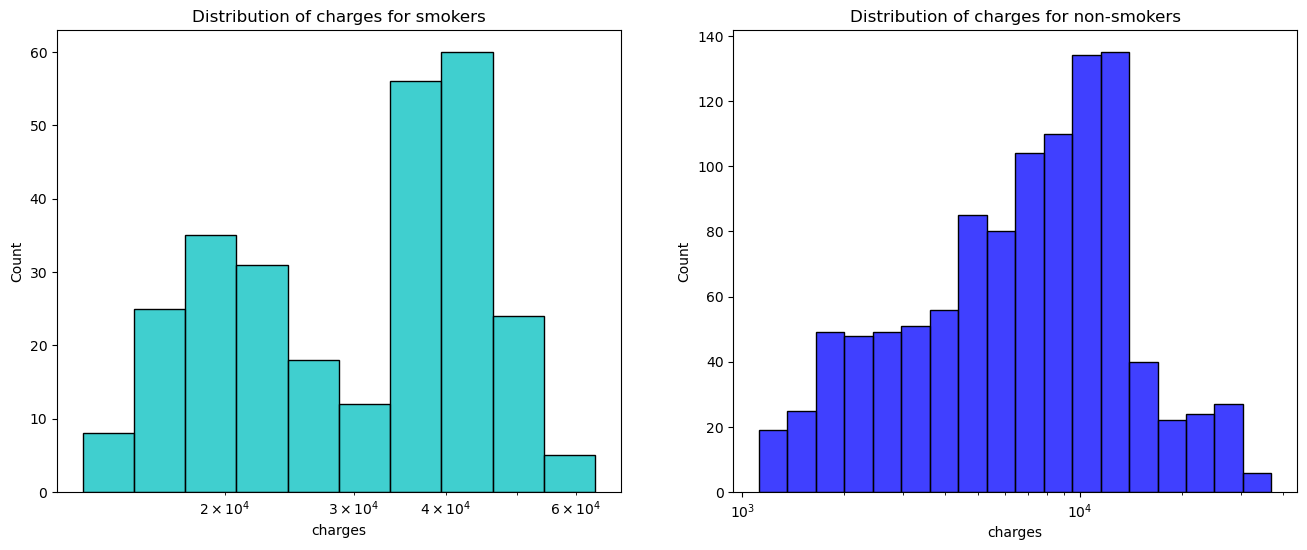

In [13]:
# Log-scale
f= pl.figure(figsize=(16,6))

ax=f.add_subplot(121)
sns.histplot(data[(data.smoker == 1)]["charges"],
             color='c', ax=ax, log_scale=True,)
ax.set_title('Distribution of charges for smokers')

ax=f.add_subplot(122)
sns.histplot(data[(data.smoker == 0)]['charges'],
             color='b', ax=ax, log_scale=True,)
ax.set_title('Distribution of charges for non-smokers')

## Patient gender count - Smoker and non-smoker

In [14]:
# 0:female 1:male
# 0:non-smoker 1:smoker

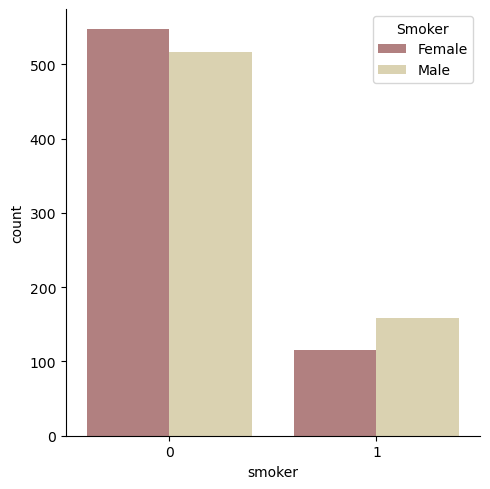

In [15]:
import matplotlib.pyplot as plt
f = sns.catplot(x="smoker", kind="count",hue = 'sex', 
            palette="pink", data=data, legend=False)
plt.legend(title='Smoker', loc='upper right',
           labels=['Female', 'Male'])
plt.show(f)

In [16]:
le.inverse_transform(data['smoker'])

array(['northwest', 'northeast', 'northeast', ..., 'northeast',
       'northeast', 'northwest'], dtype=object)

## Distribution on charge – smoker vs non smoker

<Axes: xlabel='sex', ylabel='charges'>

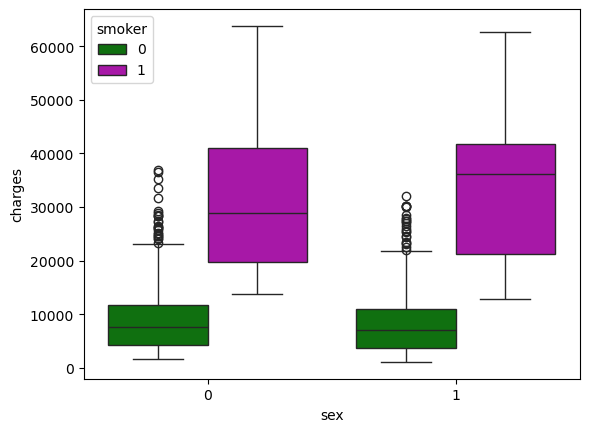

In [17]:
# 0:female 1:male
# 0:non-smoker 1:smoker
sns.boxplot(x="sex", y="charges", hue="smoker",
            palette=["g", "m"], data=data,)

## Box plot for charges of women

<Axes: title={'center': 'Box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

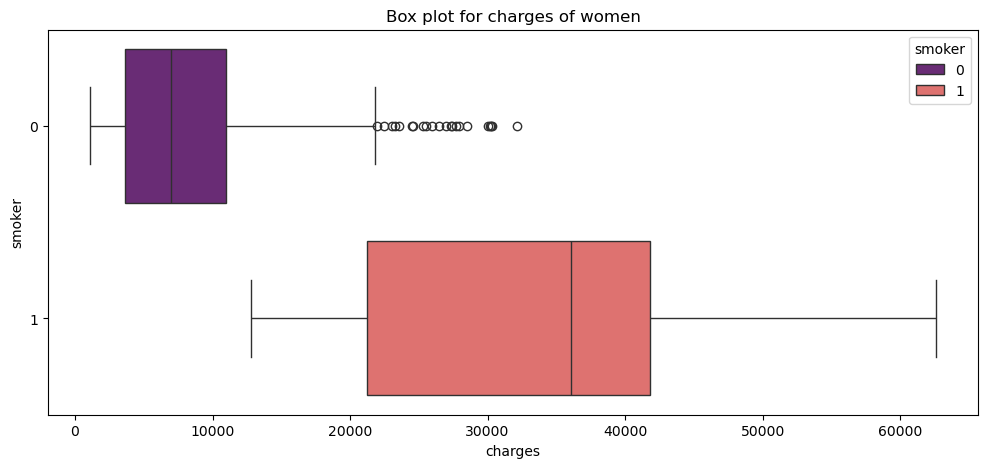

In [18]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of women")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 1)] , 
            orient="h", palette = 'magma', hue="smoker")

## Box plot for charges of men

<Axes: title={'center': 'Box plot for charges of men'}, xlabel='charges', ylabel='smoker'>

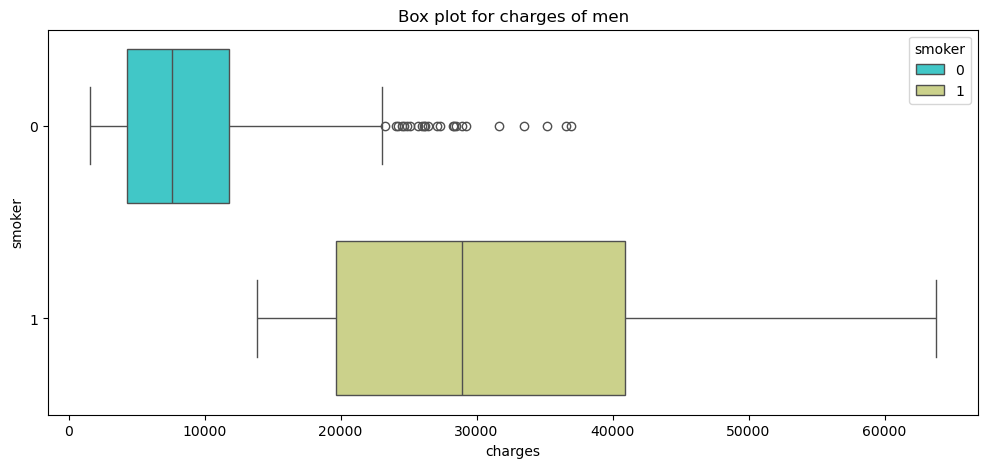

In [19]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges of men")
sns.boxplot(y="smoker", x="charges", data =  data[(data.sex == 0)] , orient="h", 
            palette = 'rainbow', hue='smoker' )

## Distribution of age

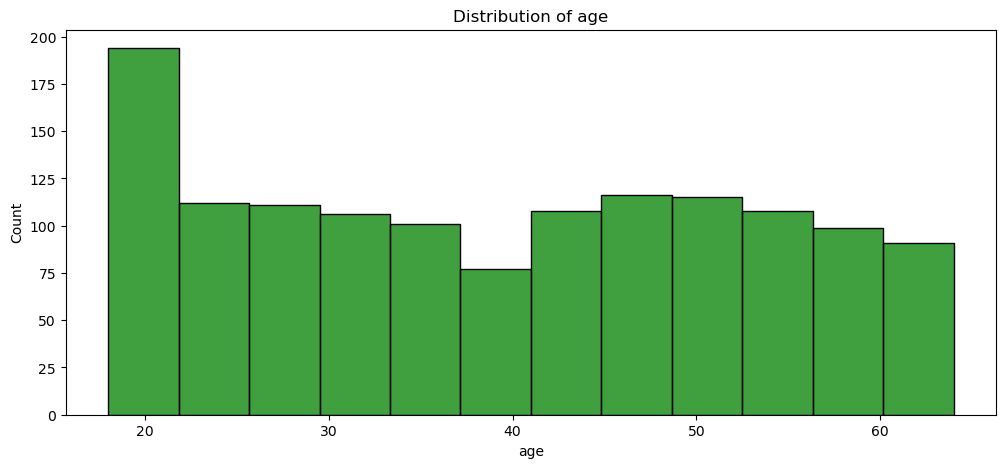

In [20]:
pl.figure(figsize=(12,5))
pl.title("Distribution of age")
ax = sns.histplot(data["age"], color = 'g')

## The number of smokers and non-smokers (18 years old)

Text(0.5, 1.0, 'The number of smokers and non-smokers (18 years old)')

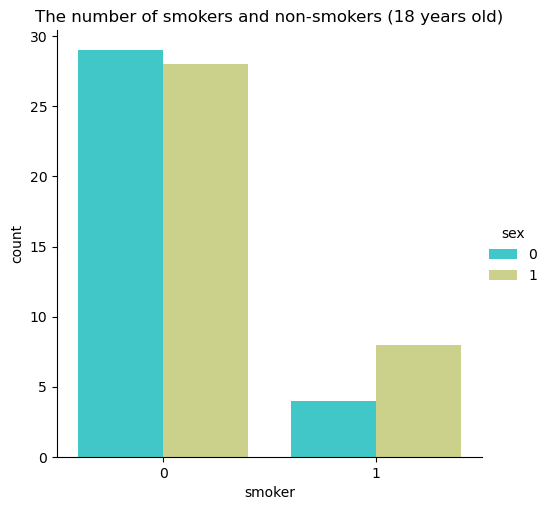

In [21]:
sns.catplot(x="smoker", kind="count",hue = 'sex', palette="rainbow", 
            data=data[(data.age == 18)])
pl.title("The number of smokers and non-smokers (18 years old)")

## 18 years old - a very young age. Does smoking affect the cost of treatment at this age?

<Axes: title={'center': 'Box plot for charges 18 years old smokers'}, xlabel='charges', ylabel='smoker'>

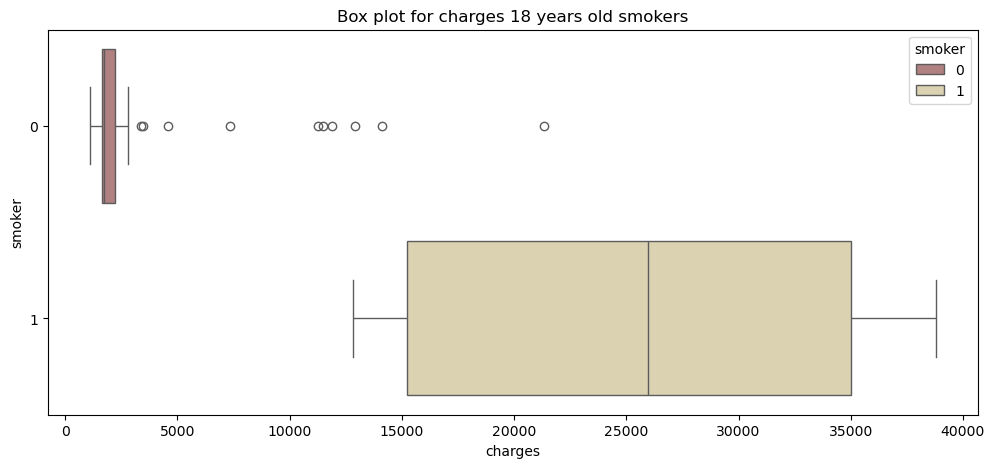

In [22]:
pl.figure(figsize=(12,5))
pl.title("Box plot for charges 18 years old smokers")
sns.boxplot(y="smoker", x="charges", data = data[(data.age == 18)] , orient="h", hue='smoker', palette = 'pink')

## Distribution of charges and age for non-smokers

Text(0.5, 1.0, 'Distribution of charges and age for non-smokers')

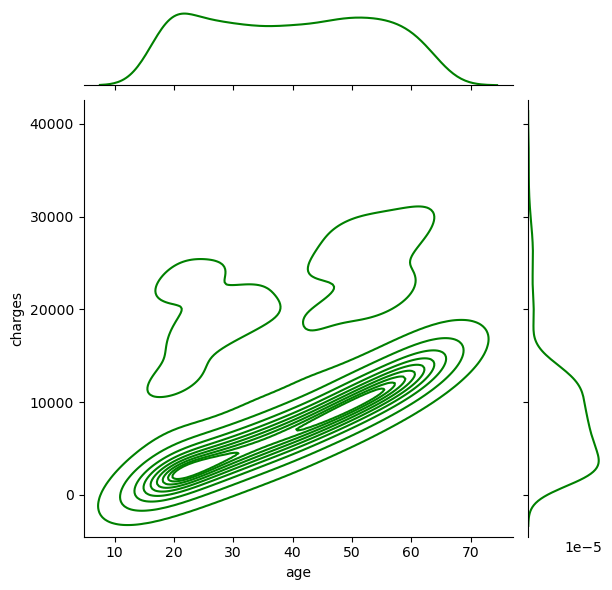

In [23]:
g = sns.jointplot(
    data=data[(data.smoker == 0)],  x="age", y="charges",
    kind="kde", color="g")
ax.set_title('Distribution of charges and age for non-smokers')

## Distribution of charges and age for smokers

Text(0.5, 1.0, 'Distribution of charges and age for smokers')

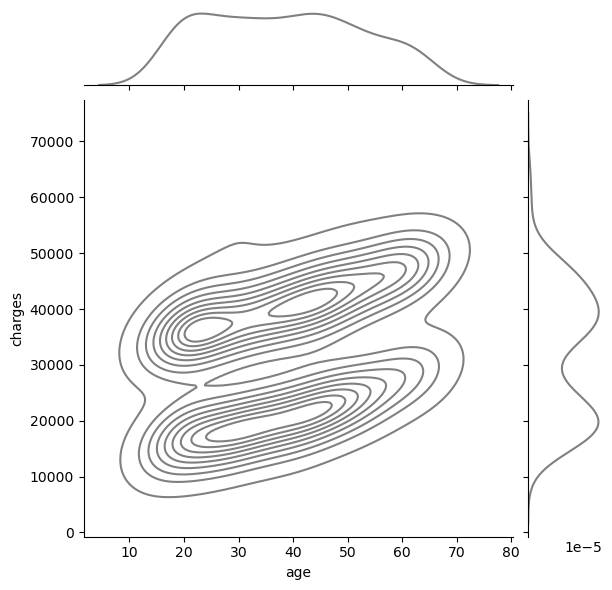

In [24]:
g = sns.jointplot(
    data=data[(data.smoker == 1)],  x="age", y="charges",
    kind="kde", color="grey")
ax.set_title('Distribution of charges and age for smokers')

## Non smoker charge distribution on age

In [39]:
fig = px.scatter(data[(data.smoker == 0)], x="age", y="charges",
             log_x=True, size_max=60, title='Non smoker charge distribution on age')
fig.show()

## Smoker charge distribution on age

In [26]:
fig = px.scatter(data[(data.smoker == 1)], x="age", y="charges", 
                  log_x=True, size_max=60, 
                 title='Smoker charge distribution on age')
fig.show()

## Smokers and non-smokers on age

Text(0.5, 1.0, 'Smokers and non-smokers')

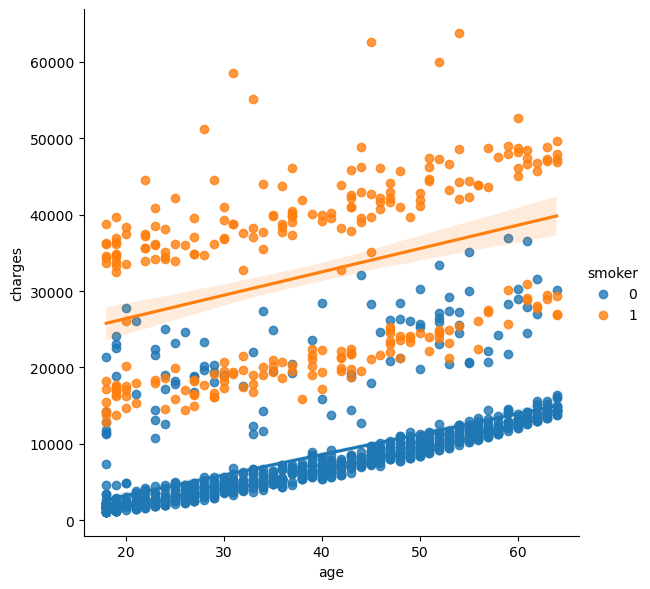

In [27]:
sns.lmplot(x="age", y="charges", hue="smoker", data=data, height=6 )
ax.set_title('Smokers and non-smokers')

## Distribution of bmi

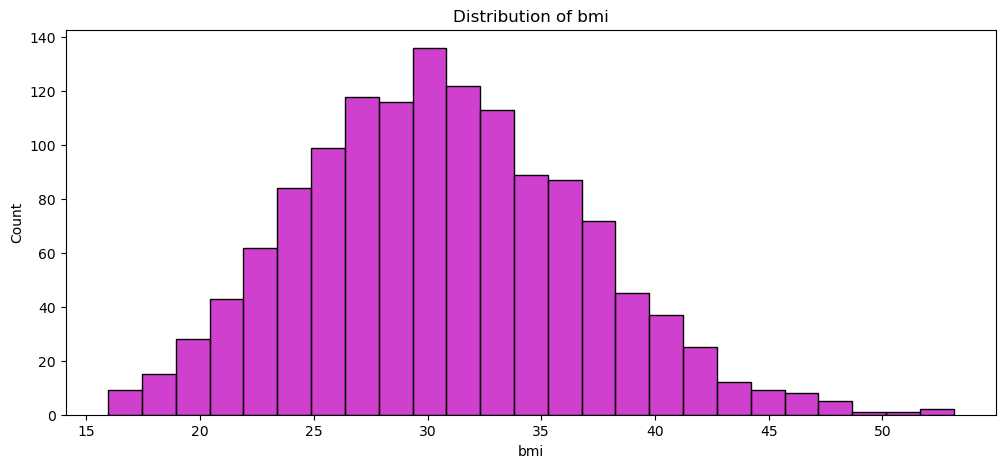

In [28]:
pl.figure(figsize=(12,5))
pl.title("Distribution of bmi")
ax = sns.histplot(data["bmi"], color = 'm')

## Distribution of charges for patients with BMI greater than 30

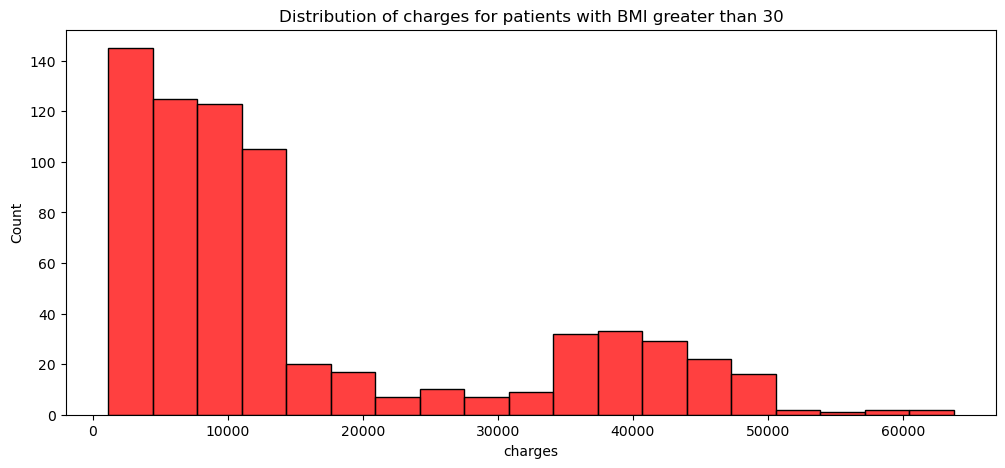

In [29]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI greater than 30")
ax = sns.histplot(data[(data.bmi >= 30)]['charges'], color = 'r')

## Distribution of charges for patients with BMI less than 30

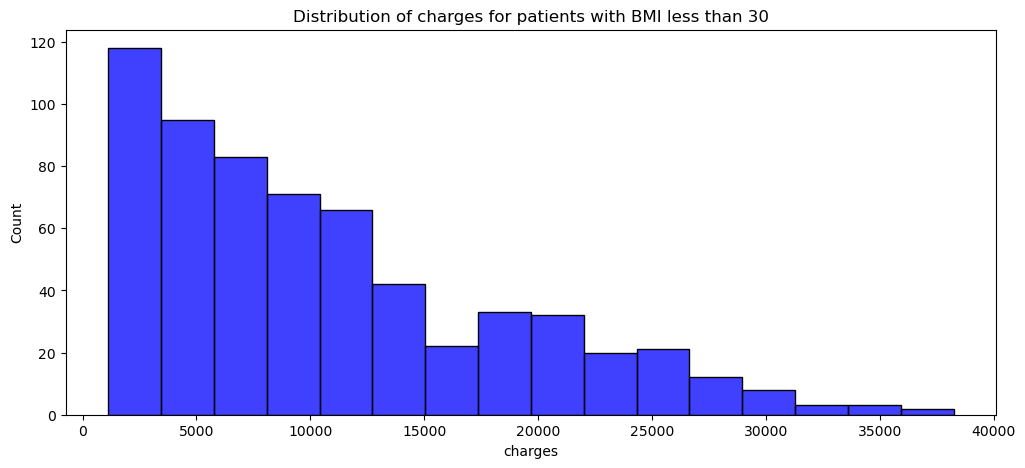

In [30]:
pl.figure(figsize=(12,5))
pl.title("Distribution of charges for patients with BMI less than 30")
ax = sns.histplot(data[(data.bmi < 30)]['charges'], color = 'b')

## Scatter plot of charges and bmi

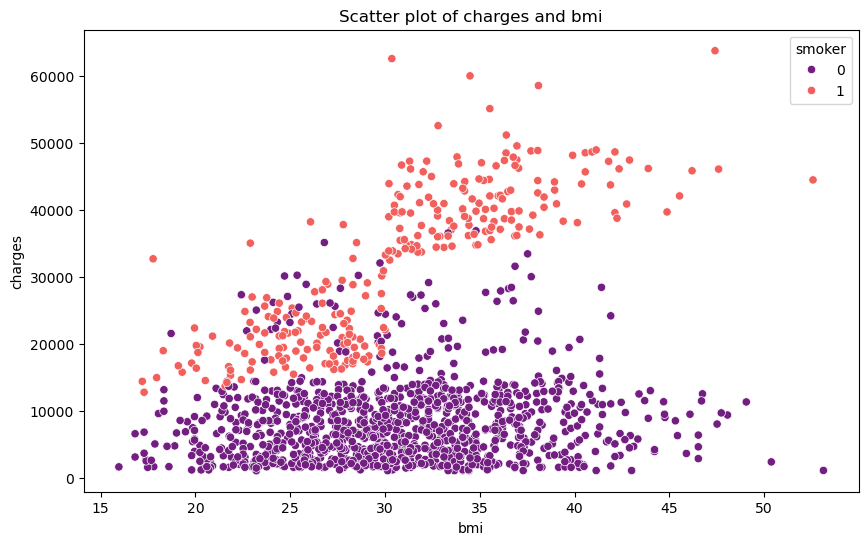

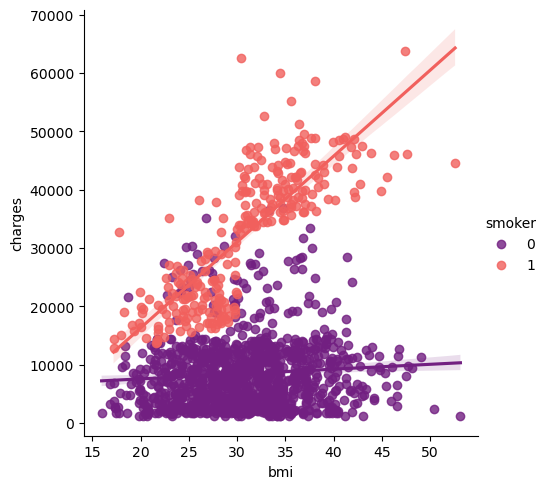

In [31]:
pl.figure(figsize=(10,6))
ax = sns.scatterplot(x='bmi',y='charges',data=data,palette='magma',hue='smoker')
ax.set_title('Scatter plot of charges and bmi')

sns.lmplot(x="bmi", y="charges", hue="smoker", data=data, palette = 'magma')

## Child patient count with how many sibling

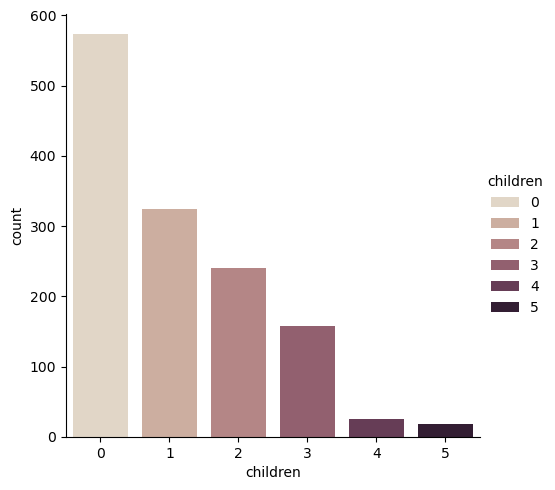

In [32]:
sns.catplot(x="children", kind="count", palette="ch:.25", data=data, hue='children')

## Smokers and non-smokers who have childrens

Text(0.5, 1.0, 'Smokers and non-smokers who have childrens')

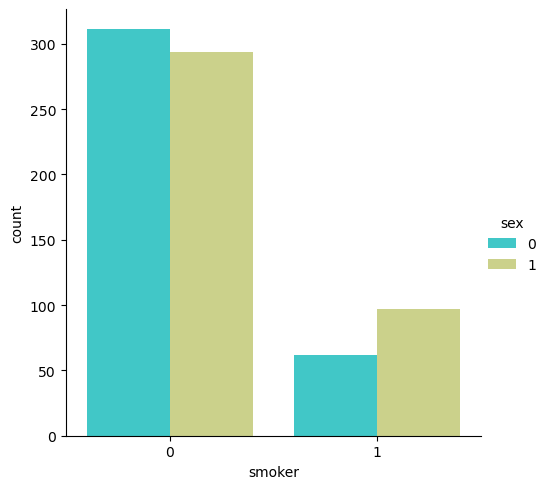

In [33]:
sns.catplot(x="smoker", kind="count", palette="rainbow",hue = "sex",
            data=data[(data.children > 0)])
ax.set_title('Smokers and non-smokers who have childrens')